###<center>Ящик Стрелкова</center>

Переводим тексты писем из их кодировок в utf-8.<br>
Оставляем только тексты писем.

In [2]:
import glob
import re
filenames = glob.glob('./box_strelkov/*.eml')

import codecs
encodings = []
for filename in filenames:
    with codecs.open(filename,'r',encoding='koi8-r') as f:
        text = f.read()
        position = text.find("charset=") + len("charset=")
        encodings.append((text[position:position+7]).strip('\"\'.;\r\n'))
for i in range(len(filenames)):
    if encodings[i] in {'koi8-r', 'KOI8-R'}:
        with codecs.open(filenames[i],'r',encoding='koi8-r') as f:
            text = f.read()
    elif encodings[i] in {'window', 'windows', 'Windows'}:
        with codecs.open(filenames[i],'r',encoding='windows-1251') as f:
            text = f.read()
    elif encodings[i] in {'utf-8', 'UTF-8', 'UTF-8;'}:
        pass
        # utf-8 encoding by default
    else:
        # unrecognizable encoding
        pass
        
    text = " ".join(re.findall("[а-яА-Я]+", text))
    with codecs.open(filenames[i],'w',encoding='utf-8') as f:
        f.write(text)
        

###Строим Bag of words

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='filename')               
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix 
vocab_list = vectorizer.get_feature_names()

dtm = dtm.toarray()
vocab = np.array(vocab_list)

print("Examples of words:")
vocab_list[1:15] + vocab_list[11200:]



Examples of words:


['абхазии',
 'абхазия',
 'аваль',
 'аванс',
 'авария',
 'аватар',
 'август',
 'августа',
 'августе',
 'августу',
 'авиации',
 'авиационный',
 'авиация',
 'аврала',
 'ясно',
 'яхт',
 'ящик',
 'ящика',
 'ящиков',
 'ящиком']

###Поcчитаем расстояния

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import ward, dendrogram

cosine_dist  = 1 - cosine_similarity(dtm)

###Построим дендрограмму

NonGuiException: 

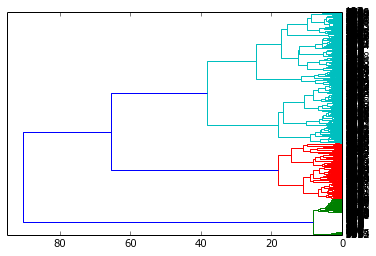

In [151]:
linkage_matrix = ward(cosine_dist)
dendrogram(linkage_matrix, orientation="right")
plt.tight_layout()

###Построим график зависимости расстояния между кластерами от номера слияния

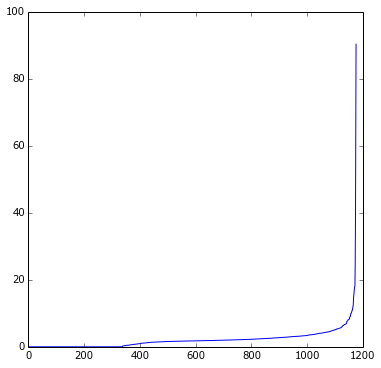

In [152]:
distances = linkage_matrix[:, 2]
figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(range(0, len(distances)), distances)